# PyGreentea Network Generator 

### Load the dependencies

In [8]:
%matplotlib inline

from __future__ import print_function
import h5py
import numpy as np
from numpy import float32, int32, uint8, dtype
import sys
import matplotlib.pyplot as plt


pygt_path = '../PyGreentea'
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), pygt_path))

import math

import PyGreentea as pygt

### Load the default network template

In [9]:
netconf = pygt.netgen.NetConf()

### Set the memory limits for the GPU

In [12]:
# We use cuDNN, so:
netconf.ignore_conv_buffer = True
# 4 GB total, ignore convolution buffer. Let's keep 0.5 GB for implementation dependent buffers.
netconf.mem_global_limit = 3.5 * 1024 * 1024 * 1024
# 4 GB convolution buffer limit
netconf.mem_buf_limit = 3.5 * 1024 * 1024 * 1024

### Explore possible network input/output shapes for the chosen settings

In [13]:
# We test memory usage for training
mode = pygt.netgen.caffe_pb2.TRAIN
# The minimum we're interested in
shape_min = [100,100,100]
# And maximum
shape_max = [200,200,200]
# We want Z and Y to be independent, but X == Y
constraints = [None, lambda x: x[0], lambda x: x[1]]

netconf.u_netconfs[0].unet_conv_down = [[[3]]]
netconf.u_netconfs[0].unet_conv_up = [[[3]]]

# Compute (can be quite intensive)
inshape, outshape, fmaps = pygt.netgen.compute_valid_io_shapes(netconf,mode,shape_min,shape_max,constraints=constraints)

-- Invalid: [100] => []
-- Invalid: [101] => []
++++ Valid: [102] => [58]
-- Invalid: [103] => []
-- Invalid: [104] => []
-- Invalid: [105] => []
-- Invalid: [106] => []
-- Invalid: [107] => []
-- Invalid: [108] => []
-- Invalid: [109] => []
++++ Valid: [110] => [66]
-- Invalid: [111] => []
-- Invalid: [112] => []
-- Invalid: [113] => []
-- Invalid: [114] => []
-- Invalid: [115] => []
-- Invalid: [116] => []
-- Invalid: [117] => []
++++ Valid: [118] => [74]
-- Invalid: [119] => []
-- Invalid: [120] => []
-- Invalid: [121] => []
-- Invalid: [122] => []
-- Invalid: [123] => []
-- Invalid: [124] => []
-- Invalid: [125] => []
++++ Valid: [126] => [82]
-- Invalid: [127] => []
-- Invalid: [128] => []
-- Invalid: [129] => []
-- Invalid: [130] => []
-- Invalid: [131] => []
-- Invalid: [132] => []
-- Invalid: [133] => []
++++ Valid: [134] => [90]
-- Invalid: [135] => []
-- Invalid: [136] => []
-- Invalid: [137] => []
-- Invalid: [138] => []
-- Invalid: [139] => []
-- Invalid: [140] => []
-- Inv

### Visualization

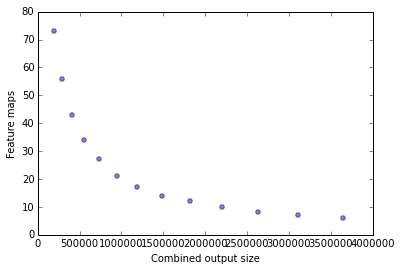

In [14]:
plt.figure()
# Combined output size versus feature map count
plt.scatter([x[0]*x[1]*x[2] for x in outshape], fmaps, alpha = 0.5)
plt.ylabel('Feature maps')
plt.xlabel('Combined output size')
plt.show()

### Pick parameters, actually generate and store the network

In [15]:
netconf.input_shape = inshape[0]
netconf.output_shape = outshape[0]
netconf.fmap_start = fmaps[0]

print ('Input shape: %s' % netconf.input_shape)
print ('Output shape: %s' % netconf.output_shape)
print ('Feature maps: %s' % netconf.fmap_start)

netconf.loss_function = "euclid"
train_net_conf_euclid, test_net_conf = pygt.netgen.create_nets(netconf)
netconf.loss_function = "malis"
train_net_conf_malis, test_net_conf = pygt.netgen.create_nets(netconf)

with open('net_train_euclid.prototxt', 'w') as f:
    print(train_net_conf_euclid, file=f)
with open('net_train_malis.prototxt', 'w') as f:
    print(train_net_conf_malis, file=f)
with open('net_test.prototxt', 'w') as f:
    print(test_net_conf, file=f)

Input shape: [102, 102, 102]
Output shape: [58, 58, 58]
Feature maps: 73
Shape: [0]
f: 1 w: [102, 102, 102] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [1]
f: 73 w: [100, 100, 100] d: [1, 1, 1]
WM: 7884
CM: 114610464
AM: 584000000
Shape: [2]
f: 73 w: [50, 50, 50] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [3]
f: 219 w: [48, 48, 48] d: [1, 1, 1]
WM: 1726596
CM: 985500000
AM: 193757184
Shape: [4]
f: 219 w: [24, 24, 24] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [5]
f: 657 w: [22, 22, 22] d: [1, 1, 1]
WM: 15539364
CM: 326965248
AM: 55965888
Shape: [6]
f: 657 w: [11, 11, 11] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [7]
f: 1971 w: [9, 9, 9] d: [1, 1, 1]
WM: 139854276
CM: 94442436
AM: 11494872
Shape: [8]
f: 1971 w: [18, 18, 18] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [9]
f: 657 w: [18, 18, 18] d: [1, 1, 1]
WM: 5179788
CM: 367835904
AM: 0
Shape: [10]
f: 1314 w: [18, 18, 18] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [11]
f: 657 w: [16, 16, 16] d: [1, 1, 1]
WM: 93236184
CM: 827630784
AM: 21528576
Shape: [12]
f: 657 w: 